<a href="https://colab.research.google.com/github/kaif033/Analysis/blob/main/banglore_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("/content/Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.drop(columns=["availability","area_type"],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [6]:
df["location"]=df["location"].str.strip()


In [7]:
df.head()

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
location_w=df["location"].value_counts()

In [9]:
def f1(x):
  try:
    float(x)
  except:
    return False
  return True

In [10]:
df[~df["total_sqft"].apply(f1)].head(-5)

,location,size,society,total_sqft,bath,balcony,price
30,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...
12652,Billamaranahalli,2 Bedroom,AWharan,300Sq. Yards,2.0,2.0,150.000
12791,Bannerghatta Road,2 BHK,PrarePa,1115 - 1130,2.0,0.0,61.740
12861,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.000
12955,Thanisandra,3 BHK,Bhe 2ko,1437 - 1629,3.0,0.0,75.885


In [11]:
import pandas as pd
import re

def process_total_sqfl(sqfl_value):
    """
    Processes a total sqfl value and returns the appropriate numerical value or None if invalid.

    Args:
        sqfl_value: The total sqfl value as a string.

    Returns:
        The processed numerical value as a float or None if invalid.
    """

    if pd.isna(sqfl_value):
        return None

    try:
        # Attempt direct conversion to float for single values
        return float(sqfl_value)
    except ValueError:
        pass

    # Extract numerical part from values with units
    match = re.match(r"^(\d+(?:\.\d+)?)(\D+)$", sqfl_value)
    if match:
        return float(match.group(1))

    # Split values with "-" and average
    try:
        values = [float(x) for x in sqfl_value.split("-")]
        if len(values) == 2:
            return sum(values) / len(values)
    except ValueError:
        pass

    # Handle invalid format
    return None

# Example usage with your DataFrame (assuming it's named "df")
df["total_sqft"] = df["total_sqft"].apply(process_total_sqfl)


In [12]:
df["size"]=df["size"].str.split(" ").str[0]

In [13]:
df[df["size"].isna()]

,location,size,society,total_sqft,bath,balcony,price
579,Sarjapur Road,NaN,Asiss B,1800.0,NaN,NaN,34.185
1775,IVC Road,NaN,Orana N,3817.0,NaN,NaN,124.000
2264,Banashankari,NaN,NaN,2400.0,NaN,NaN,460.000
2809,Sarjapur Road,NaN,AsdiaAr,1800.0,NaN,NaN,28.785
2862,Devanahalli,NaN,Ajleyor,1950.0,NaN,NaN,46.800
5333,Devanahalli,NaN,Emngs S,3752.5,NaN,NaN,177.115
6423,Whitefield,NaN,SRniaGa,2324.0,NaN,NaN,26.730
6636,Jigani,NaN,S2enste,1500.0,NaN,NaN,25.490
6719,Hoskote,NaN,SJowsn,1730.0,NaN,NaN,28.545
7680,Kasavanhalli,NaN,NaN,5000.0,NaN,NaN,400.000


In [14]:
df.drop(columns="society",inplace=True)

In [15]:
df["size"].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', nan, '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [16]:
df["balcony"]=df["balcony"].fillna(df["balcony"].mode()[0])

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_sqft,bath,balcony,price
total_sqft,1.000000,0.391148,0.155340,0.573396
bath,0.391148,1.000000,0.209664,0.456345
balcony,0.155340,0.209664,1.000000,0.124951
price,0.573396,0.456345,0.124951,1.000000


In [18]:
df["size"].dropna(inplace=True)

In [19]:
df["size"].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', nan, '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [20]:
df.dropna(inplace=True)

In [21]:
df["size"]=df["size"].astype('int')

In [22]:
df["bath"]=df["bath"].astype('int')

In [23]:
# Assuming your DataFrame is named 'df'
df.loc[df['bath'] > df['size'], 'bath'] = df['size']

In [24]:
df["balcony"]=df["balcony"].astype('int')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int64  
 2   total_sqft  13246 non-null  float64
 3   bath        13246 non-null  int64  
 4   balcony     13246 non-null  int64  
 5   price       13246 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ MB


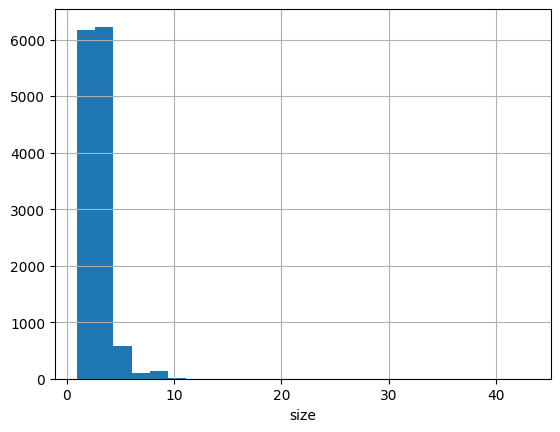

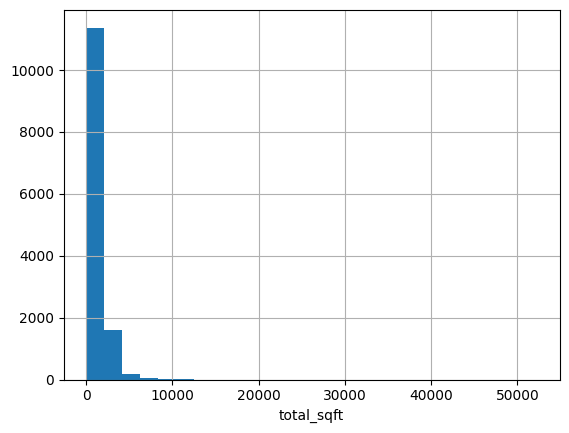

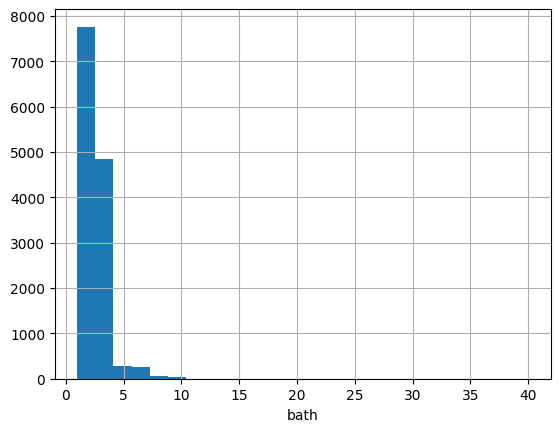

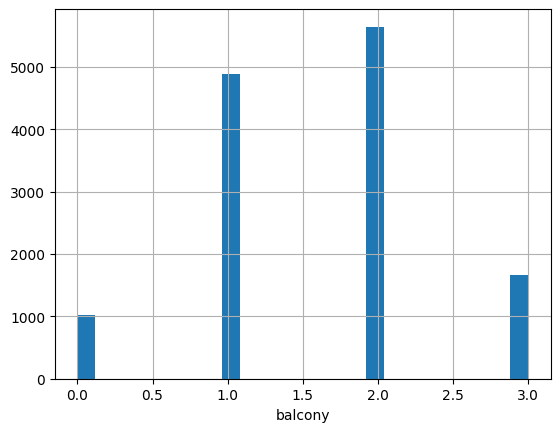

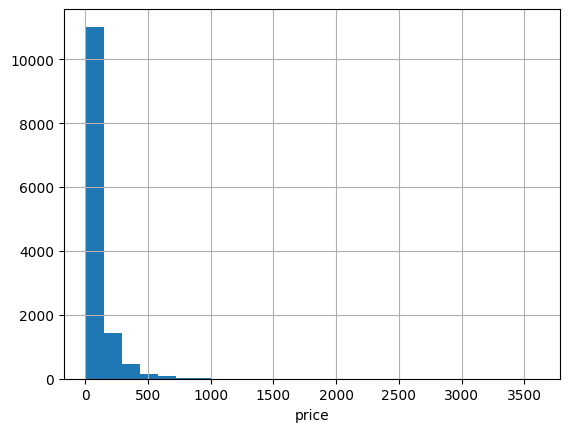

In [26]:
numerical=['size','total_sqft','bath','balcony','price']
for feature in numerical:
  df[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.show()

In [27]:
df.describe()

,size,total_sqft,bath,balcony,price
count,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000
mean,2.801902,1551.642393,2.609241,1.601163,112.389392
std,1.295758,1237.814808,1.218563,0.804759,149.076587
min,1.000000,1.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1272.000000,2.000000,2.000000,72.000000
75%,3.000000,1670.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,3600.000000


In [28]:
df = df[df['price'] <= 1000]

In [29]:
df=df[df["bath"]<10]

In [30]:
df=df[df["total_sqft"]<3000]

In [31]:
df=df[df["total_sqft"]!=1]

In [32]:
df=df[df["total_sqft"]>1000]

In [33]:
df.describe()

,size,total_sqft,bath,balcony,price
count,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000
mean,2.780602,1471.373323,2.579511,1.668712,98.113311
std,1.008374,413.325619,0.935822,0.776239,77.504918
min,1.000000,1001.000000,1.000000,0.000000,12.000000
25%,2.000000,1190.000000,2.000000,1.000000,54.000000
50%,3.000000,1330.000000,2.000000,2.000000,75.000000
75%,3.000000,1650.000000,3.000000,2.000000,115.000000
max,12.000000,2999.970000,9.000000,3.000000,1000.000000


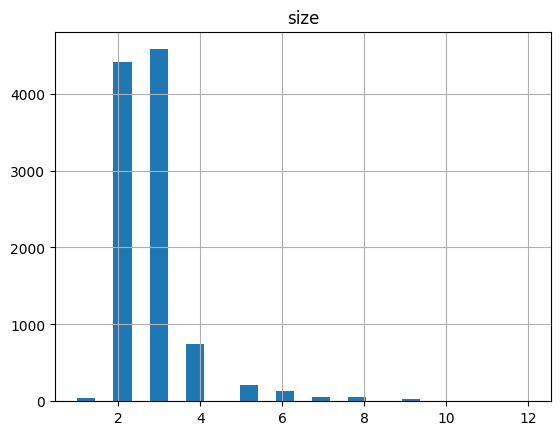

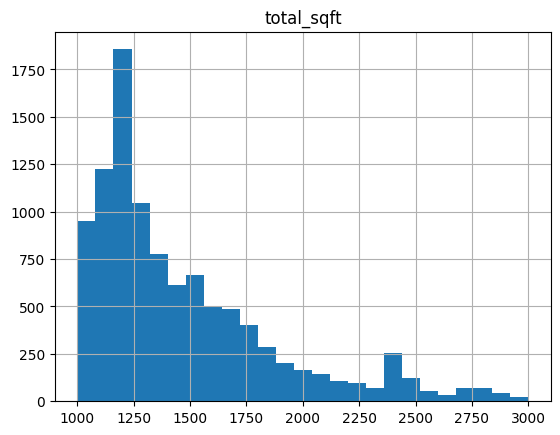

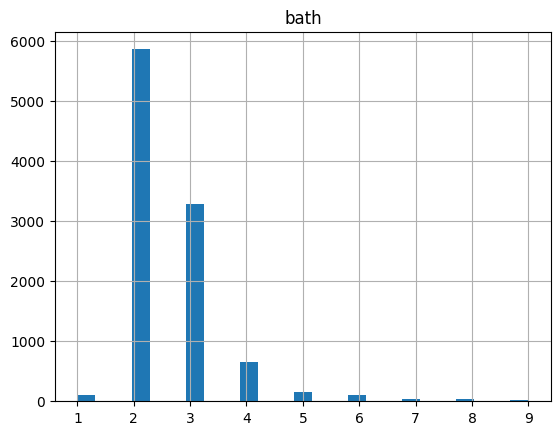

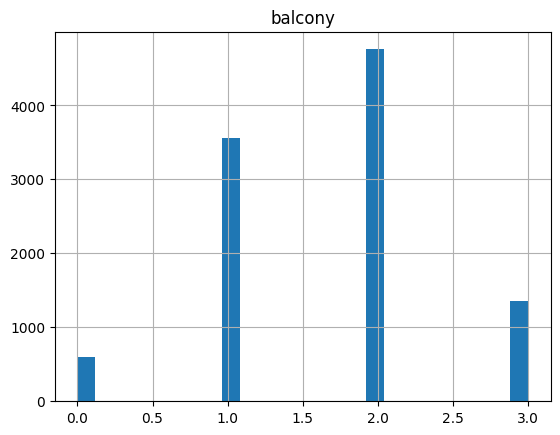

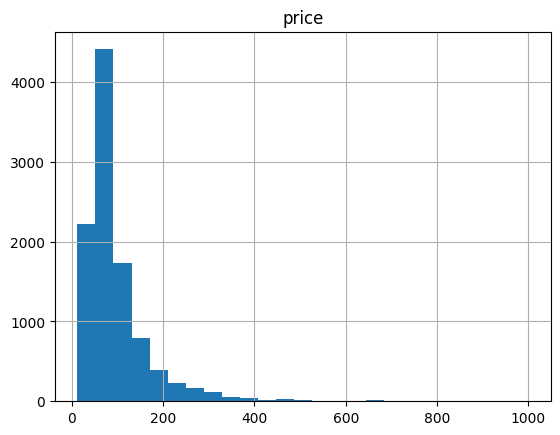

In [34]:
for feature in ['size','total_sqft','bath','balcony','price']:
  df[feature].hist(bins=25)
  plt.title(feature)
  plt.show()


In [35]:
df['price_per_sqft'] = df['price'] / df['total_sqft']*100000

In [36]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,size,total_sqft,bath,balcony,price,price_per_sqft
size,1.000000,0.434540,0.894644,0.126986,0.481458,0.466243
total_sqft,0.434540,1.000000,0.461553,0.177295,0.618204,0.276149
bath,0.894644,0.461553,1.000000,0.156256,0.498978,0.472759
balcony,0.126986,0.177295,0.156256,1.000000,0.065160,0.007002
price,0.481458,0.618204,0.498978,0.065160,1.000000,0.887488
price_per_sqft,0.466243,0.276149,0.472759,0.007002,0.887488,1.000000


In [37]:
df.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000
mean,2.780602,1471.373323,2.579511,1.668712,98.113311,6378.418479
std,1.008374,413.325619,0.935822,0.776239,77.504918,3735.239386
min,1.000000,1001.000000,1.000000,0.000000,12.000000,500.000000
25%,2.000000,1190.000000,2.000000,1.000000,54.000000,4262.295082
50%,3.000000,1330.000000,2.000000,2.000000,75.000000,5350.289762
75%,3.000000,1650.000000,3.000000,2.000000,115.000000,6964.285714
max,12.000000,2999.970000,9.000000,3.000000,1000.000000,47994.652406


In [38]:
df=df[df["bath"]!=9]

In [39]:
df=df[df['size']<7]

In [40]:
df["size"].value_counts()

3    4576
2    4417
4     743
5     211
6     130
1      48
Name: size, dtype: int64

In [41]:
df.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,10125.000000,10125.000000,10125.000000,10125.000000,10125.000000,10125.000000
mean,2.707852,1469.872953,2.517432,1.666074,96.701194,6282.132595
std,0.801386,411.394593,0.763019,0.773933,76.153403,3605.775383
min,1.000000,1001.000000,1.000000,0.000000,12.000000,500.000000
25%,2.000000,1190.000000,2.000000,1.000000,54.000000,4250.467290
50%,3.000000,1330.000000,2.000000,2.000000,74.000000,5319.148936
75%,3.000000,1650.000000,3.000000,2.000000,110.000000,6886.151261
max,6.000000,2999.970000,6.000000,3.000000,1000.000000,47994.652406


In [42]:
loc=df["location"].value_counts().reset_index()

In [43]:
loc

,index,location
0,Whitefield,428
1,Sarjapur Road,312
2,Electronic City,224
3,Kanakpura Road,206
4,Thanisandra,198
...,...,...
1083,Medi Agrahara,1
1084,Bidrahalli,1
1085,Sadduguntepalya,1
1086,Shirdi Sai Nagar,1


In [44]:
select=loc[loc["location"]>50]

In [45]:
select
selected_locations=[location for location in select["index"]]
selected_locations

['Whitefield',
 'Sarjapur  Road',
 'Electronic City',
 'Kanakpura Road',
 'Thanisandra',
 'Uttarahalli',
 'Yelahanka',
 'Raja Rajeshwari Nagar',
 'Marathahalli',
 'Hennur Road',
 'Hebbal',
 'Haralur Road',
 'Bannerghatta Road',
 '7th Phase JP Nagar',
 'Electronic City Phase II',
 'Rajaji Nagar',
 'Begur Road',
 'Bellandur',
 'Harlur',
 'Hoodi',
 'Kasavanhalli',
 'Koramangala',
 'Banashankari',
 'KR Puram',
 'Hormavu',
 'Yeshwanthpur',
 'Jakkur',
 'Kaggadasapura',
 'Varthur',
 'Akshaya Nagar',
 'Electronics City Phase 1',
 'Kothanur',
 'Hosa Road',
 'Sarjapur',
 'Old Madras Road']

In [46]:
df["location"]=df["location"].apply(lambda x: "others" if x not in selected_locations else x)

In [51]:
df=df.reset_index(drop=True)

In [52]:
df

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,others,4,2600.0,4,3,120.00,4615.384615
2,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,others,3,1521.0,3,1,95.00,6245.890861
4,Kothanur,2,1200.0,2,1,51.00,4250.000000
...,...,...,...,...,...,...,...
10120,others,2,1050.0,2,2,52.71,5020.000000
10121,Bellandur,2,1262.0,2,2,47.00,3724.247227
10122,Uttarahalli,3,1345.0,2,1,57.00,4237.918216
10123,others,3,1715.0,3,3,112.00,6530.612245


In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named 'df'

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unseen locations

# Fit the encoder to the "locations" column
encoder.fit(df[["location"]])

# Transform the "locations" column into one-hot encoded features
encoded_locations = encoder.transform(df[["location"]]).toarray()

# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(encoded_locations, columns=encoder.get_feature_names_out())

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original "locations" column
df = df.drop("location", axis=1)


       size  total_sqft  bath  balcony   price  price_per_sqft  \
0         2      1056.0     2        1   39.07     3699.810606   
1         4      2600.0     4        3  120.00     4615.384615   
2         3      1440.0     2        3   62.00     4305.555556   
3         3      1521.0     3        1   95.00     6245.890861   
4         2      1200.0     2        1   51.00     4250.000000   
...     ...         ...   ...      ...     ...             ...   
10120     2      1050.0     2        2   52.71     5020.000000   
10121     2      1262.0     2        2   47.00     3724.247227   
10122     3      1345.0     2        1   57.00     4237.918216   
10123     3      1715.0     3        3  112.00     6530.612245   
10124     2      1141.0     2        1   60.00     5258.545136   

       location_7th Phase JP Nagar  location_Akshaya Nagar  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                    

In [54]:
df

,size,total_sqft,bath,balcony,price,price_per_sqft,location_7th Phase JP Nagar,location_Akshaya Nagar,location_Banashankari,location_Bannerghatta Road,...,location_Rajaji Nagar,location_Sarjapur,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Varthur,location_Whitefield,location_Yelahanka,location_Yeshwanthpur,location_others
0,2,1056.0,2,1,39.07,3699.810606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2600.0,4,3,120.00,4615.384615,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1440.0,2,3,62.00,4305.555556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1521.0,3,1,95.00,6245.890861,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1200.0,2,1,51.00,4250.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,2,1050.0,2,2,52.71,5020.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10121,2,1262.0,2,2,47.00,3724.247227,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10122,3,1345.0,2,1,57.00,4237.918216,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10123,3,1715.0,3,3,112.00,6530.612245,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
df.rename(columns={"size":"bhk"},inplace=True)

In [68]:
df.columns

Index(['bhk', 'total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft',
       'location_7th Phase JP Nagar', 'location_Akshaya Nagar',
       'location_Banashankari', 'location_Bannerghatta Road',
       'location_Begur Road', 'location_Bellandur', 'location_Electronic City',
       'location_Electronic City Phase II',
       'location_Electronics City Phase 1', 'location_Haralur Road',
       'location_Harlur', 'location_Hebbal', 'location_Hennur Road',
       'location_Hoodi', 'location_Hormavu', 'location_Hosa Road',
       'location_Jakkur', 'location_KR Puram', 'location_Kaggadasapura',
       'location_Kanakpura Road', 'location_Kasavanhalli',
       'location_Koramangala', 'location_Kothanur', 'location_Marathahalli',
       'location_Old Madras Road', 'location_Raja Rajeshwari Nagar',
       'location_Rajaji Nagar', 'location_Sarjapur', 'location_Sarjapur  Road',
       'location_Thanisandra', 'location_Uttarahalli', 'location_Varthur',
       'location_Whitefield', 'locatio

In [57]:

from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and your target variable is 'price'

# Separate features (X) and target variable (y)
X = df.drop("price", axis=1)  # Features
y = df["price"]  # Target variable

# Split into training and testing sets (75% for training, 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])



Training set size: 7593
Testing set size: 2532


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler only on the training data
scaler.fit(X_train)

# Transform both training and testing sets using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data:", X_train_scaled)
print("Scaled testing data:", X_test_scaled)


Scaled training data: [[-0.88390821 -0.71671044 -0.6761316  ... -0.1335231  -0.07368192
  -1.20981815]
 [ 0.35689694  3.03651093  0.62754216 ... -0.1335231  -0.07368192
   0.8265705 ]
 [-0.88390821 -0.58318704 -0.6761316  ... -0.1335231  -0.07368192
   0.8265705 ]
 ...
 [-0.88390821 -0.80167987 -0.6761316  ... -0.1335231  -0.07368192
  -1.20981815]
 [ 0.35689694  0.24223034  0.62754216 ... -0.1335231  -0.07368192
   0.8265705 ]
 [-0.88390821 -0.65601798 -0.6761316  ... -0.1335231  -0.07368192
  -1.20981815]]
Scaled testing data: [[-0.88390821 -1.11728063 -0.6761316  ... -0.1335231  -0.07368192
  -1.20981815]
 [-0.88390821 -0.65601798 -0.6761316  ... -0.1335231  -0.07368192
  -1.20981815]
 [ 0.35689694  0.67921601  0.62754216 ... -0.1335231  -0.07368192
   0.8265705 ]
 ...
 [-0.88390821 -1.05658818 -0.6761316  ... -0.1335231  -0.07368192
   0.8265705 ]
 [-0.88390821 -0.99589573 -0.6761316  ... -0.1335231  -0.07368192
   0.8265705 ]
 [ 0.35689694 -0.41324817 -0.6761316  ... -0.1335231  -

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model on the scaled training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = rf.predict(X_test_scaled)

# Calculate various performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



Mean Squared Error: 31.851364602469374
Mean Absolute Error: 0.9264793641390203
R-squared: 0.9948828098433263


In [62]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor  # Assuming you're using Random Forest

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    # Add more hyperparameters as needed
}

# Create a KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=kfold)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Access the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters:", best_params)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [65]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42,
                       max_depth=None, min_samples_split= 2)  # Adjust hyperparameters as needed

# Train the model on the scaled training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = rf.predict(X_test_scaled)

# Calculate various performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



Mean Squared Error: 31.851364602469374
Mean Absolute Error: 0.9264793641390203
R-squared: 0.9948828098433263


In [70]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(RandomForestRegressor,f)


In [71]:
import pickle

# Open the saved model file in read-binary mode ("rb")
with open("model.pkl", "rb") as f:
    # Load the model object from the file
    loaded_model = pickle.load(f)


In [75]:

import streamlit as st
import pickle

# Load the saved model and scaler (adjust filenames if needed)
with open("model.pkl", "rb") as f:
    model = pickle.load(f)


# Define a prediction function
def predict_price(bhk, total_sqft, bath, balcony, location):
    input_data = scaler.transform([[bhk, total_sqft, bath, balcony, *location]])  # Scale input
    prediction = model.predict(input_data)
    return prediction[0]  # Extract single value

# Create the Streamlit app
st.title("House Price Prediction App")

# Input features
bhk = st.number_input("Enter BHK:", min_value=1, max_value=10)
total_sqft = st.number_input("Enter Total Square Feet:")
bath = st.number_input("Enter Number of Bathrooms:", min_value=1)
balcony = st.number_input("Enter Number of Balconies:", min_value=0)

# Location selection
location = st.selectbox("Select Location:", sorted(list(df.columns)[-30:]))

# Prediction button
if st.button("Predict Price"):
    predicted_price = predict_price(bhk, total_sqft, bath, balcony, df[location].values)
    st.write("Predicted Price: ₹", predicted_price)
